Naive Bayes Classification เป็นการจัดหมวดหมู่ข้อมูล โดยใช้หลักความน่าจะเป็นเข้ามาช่วยในการคำนวณ

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#data = pd.read_csv('annual-number-of-deaths-by-cause.csv')

data = pd.read_csv('breast-cancer.csv').round(2)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.12,0.28,0.30,0.15,...,25.38,17.33,184.60,2019.0,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,M,20.57,17.77,132.90,1326.0,0.08,0.08,0.09,0.07,...,24.99,23.41,158.80,1956.0,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,M,19.69,21.25,130.00,1203.0,0.11,0.16,0.20,0.13,...,23.57,25.53,152.50,1709.0,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,M,11.42,20.38,77.58,386.1,0.14,0.28,0.24,0.11,...,14.91,26.50,98.87,567.7,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,M,20.29,14.34,135.10,1297.0,0.10,0.13,0.20,0.10,...,22.54,16.67,152.20,1575.0,0.14,0.20,0.40,0.16,0.24,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11,0.12,0.24,0.14,...,25.45,26.40,166.10,2027.0,0.14,0.21,0.41,0.22,0.21,0.07
565,926682,M,20.13,28.25,131.20,1261.0,0.10,0.10,0.14,0.10,...,23.69,38.25,155.00,1731.0,0.12,0.19,0.32,0.16,0.26,0.07
566,926954,M,16.60,28.08,108.30,858.1,0.08,0.10,0.09,0.05,...,18.98,34.12,126.70,1124.0,0.11,0.31,0.34,0.14,0.22,0.08
567,927241,M,20.60,29.33,140.10,1265.0,0.12,0.28,0.35,0.15,...,25.74,39.42,184.60,1821.0,0.16,0.87,0.94,0.26,0.41,0.12


หมายเหตุ: diagnosis การวินิจฉัยโรคมะเร็งเต้านม
M = Malignant เป็นมะเร็ง
์B = Benign ไม่เป็นมะเร็ง

In [3]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
#s = data.loc[:,['Malaria','Drowning','Interviolence','HIV','Drug','Entity']]

data.describe().round(2)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,3.037183e+07,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,1.250206e+08,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,8.670000e+03,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,8.692180e+05,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,9.060240e+05,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,8.813129e+06,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,9.113205e+08,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
# m = s[s.HIV == 0].reset_index()
#m = s[s.Malaria == 0].reset_index()

In [10]:
# malaria_zero = s.Malaria[s.Malaria == 0].count()
# print('malaria_zero = {}'.format(malaria_zero))
# print('{:.2f} %'.format(malaria_zero / s.shape[0] * 100))

In [34]:
# ในกรณีที่พบ 0 ไม่มาก คือไม่มากกว่า 1.43% ไม่ต้องตัดออกให้ใช้วิธีเติมค่าเฉลี่ย
# df['HIV'] = df.HIV.replace(0, df.HIV.mean())

In [12]:
# #ตัด 0 ทิ้ง ออกจากคอลัมน์
# df = s[s.Malaria > 0]
# df.describe()

In [13]:
# #ในกรณีที่พบ 0 ไม่มาก คือไม่มากกว่า 1.43% ไม่ต้องตัดออกให้ใช้วิธีเติมค่าเฉลี่ย
# df['HIV'] = df.HIV.replace(0, df.HIV.mean())
# df.describe()
# 10 Countries in AEC
# ms = df.loc[df['Entity'].isin(['Singapore','Indonesia','Thailand','Myanmar','Vietnam','Brunei','Laos','Cambodia','Malaysia','Philippines'])].dropna()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
X = data.iloc[:, 2:7].values 
y = data.iloc[:, 1].values 


In [8]:
print(f'แบ่งกลุ่มข้อมูล X: {X}',
      f'แบ่งกลุ่มข้อมูล y: {y}',
      sep = '\n')

แบ่งกลุ่มข้อมูล X: [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.200e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.000e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.100e-01]
 ...
 [1.660e+01 2.808e+01 1.083e+02 8.581e+02 8.000e-02]
 [2.060e+01 2.933e+01 1.401e+02 1.265e+03 1.200e-01]
 [7.760e+00 2.454e+01 4.792e+01 1.810e+02 5.000e-02]]
แบ่งกลุ่มข้อมูล y: ['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' '

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [10]:
X_train

array([[1.989e+01, 2.026e+01, 1.305e+02, 1.214e+03, 1.000e-01],
       [1.185e+01, 1.746e+01, 7.554e+01, 4.327e+02, 8.000e-02],
       [2.175e+01, 2.099e+01, 1.473e+02, 1.491e+03, 9.000e-02],
       ...,
       [1.137e+01, 1.889e+01, 7.217e+01, 3.960e+02, 9.000e-02],
       [1.134e+01, 2.126e+01, 7.248e+01, 3.965e+02, 9.000e-02],
       [1.216e+01, 1.803e+01, 7.829e+01, 4.553e+02, 9.000e-02]])

In [11]:
y_train

array(['M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B

In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred.reshape(-1, 1)

array([['B'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['M'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
      

การป้อนข้อมูลพยากรณ์ วิธีที่ 1

In [94]:
#การป้อนข้อมูลพยากรณ์

pred1 = [[17.99,10.38,122.80,1001.0,0.12],
         [7.76,24.54,47.92,181.0,0.05]]
         
df = model.predict(pred1)

i = 1
for m in range(len(df)):
    print('%d' %i, df[m])
    i += 1

1 M
2 B


c:\Users\Taechatuch\anaconda3\envs\mydata\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


การป้อนข้อมูลพยากรณ์ วิธีที่ 2

In [79]:
#การป้อนข้อมูลพยากรณ์โมเดล

radius_mean = float(input("Enter radius_mean: "))
texture_mean = float(input("Enter texture_mean: "))
perimeter_mean = float(input("Enter perimeter_mean: "))
area_mean = float(input("Enter area_mean: "))
smoothness_mean = float(input("Enter smoothness_mean: "))

In [81]:
result = model.predict([[radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean]])
print("การตรวจเบาหวานในสตรีมีครรภ์พบว่ามีค่าเป็น:", result, "(M: Malignant = เป็นมะเร็ง, B: Benign = ไม่เป็นมะเร็ง)")

การตรวจเบาหวานในสตรีมีครรภ์พบว่ามีค่าเป็น: ['M'] (M: Malignant = เป็นมะเร็ง, B: Benign = ไม่เป็นมะเร็ง)


c:\Users\Taechatuch\anaconda3\envs\mydata\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


การบันทึกโมเดลไว้ใช้งาน

In [14]:
#conda install -c anaconda scikit-learn
#pip install -U scikit-learn
#from sklearn.externals import joblib
import numpy as np
import joblib

joblib.dump(model, 'breast_model.pkl')
model = joblib.load('breast_model.pkl')

การป้อนข้อมูลพยากรณ์ วิธีที่ 3

In [70]:
ypred = pd.DataFrame(y_pred)
data = ypred.rename(columns={0:'ข้อมูลพยากรณ์'})
data 

,ข้อมูลพยากรณ์
0,B
1,B
2,M
3,M
4,B
...,...
166,B
167,B
168,B
169,B


In [71]:
ytest = pd.DataFrame(y_test).reset_index()
data2 = ytest.rename(columns={'Entity':'ข้อมูลจริง'})
dt = data2.drop(['index'], axis=1) #ลบคอลัมน์ index
dt 

,diagnosis
0,B
1,B
2,M
3,B
4,B
...,...
166,M
167,B
168,B
169,B


In [72]:
#ตารางเปรียบเทียบข้อมูลจริงและการพยากรณ์
#total.to_csv('data.csv')
#total.to_excel('data.xlsx')

total = pd.concat([dt,data],axis=1) #.round(0)
total

,diagnosis,ข้อมูลพยากรณ์
0,B,B
1,B,B
2,M,M
3,B,M
4,B,B
...,...,...
166,M,B
167,B,B
168,B,B
169,B,B


In [73]:
Xtest = X_test.reset_index()
ds = Xtest.drop(['index'], axis=1) #ลบคอลัมน์ index
sum = pd.concat([ds, total],axis=1) #.round(0)
sum 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,diagnosis,ข้อมูลพยากรณ์
0,13.05,18.59,85.09,512.0,0.11,B,B
1,10.16,19.59,64.73,311.7,0.10,B,B
2,16.24,18.77,108.80,805.1,0.11,M,M
3,14.87,20.21,96.12,680.9,0.10,B,M
4,13.40,16.95,85.48,552.4,0.08,B,B
...,...,...,...,...,...,...,...
166,14.42,19.77,94.48,642.5,0.10,M,B
167,13.38,30.72,86.34,557.2,0.09,B,B
168,13.66,15.15,88.27,580.6,0.08,B,B
169,12.46,12.83,78.83,477.3,0.07,B,B


การประเมินโมเดล Naive Bay

In [77]:
class_names = data['diagnosis'].unique()
class_names

array(['M', 'B'], dtype=object)

Accuracy Score: 0.91
              precision    recall  f1-score   support

           M       0.91      0.95      0.93       112
           B       0.89      0.83      0.86        59

    accuracy                           0.91       171
   macro avg       0.90      0.89      0.89       171
weighted avg       0.91      0.91      0.91       171

[[106   6]
 [ 10  49]]


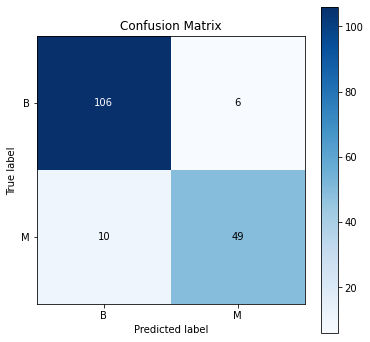

In [78]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))
#print('Accuracy Score:',accuracy_score(y_test, y_predict).round(2))
print(classification_report(y_test, y_pred, target_names=class_names))
cm = confusion_matrix(y_test, y_pred)
print(cm)

#pip install scikit-plot
import scikitplot as skplot
plt.rcParams['figure.figsize'] = 6,6 #10 x 10
skplot.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()